# Introduction:
This is code tests Knowledge Distillation (KD) technique on the Primary breast cancer vs Normal breast tissue (PBCNT) with oversampling. 

Please remember to cite our work.

Thank you.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

%matplotlib inline 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils



#Import models from scikit learn module:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#For Timing the simulation
import time

# Parameters

In [2]:
epoch=50          #training epoch

# Loading Data

In [3]:
#load dataset
#data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv",header = 0)
data = pd.read_csv("/kaggle/input/primary-breast-cancer-vs-normal-breast-tissue/GSE58606_data.csv",header = 0)
data.head(5)

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
0,6.877643,8.080215,6.245265,6.304782,6.686064,7.805950,6.814781,7.146955,6.170680,6.129586,...,7.176684,7.724408,6.035476,6.255048,6.572019,6.251777,5.873303,6.362097,1,primary breast cancer
1,6.544287,6.882722,5.874236,6.324987,6.638048,6.946567,6.488574,6.690773,6.160272,6.104929,...,7.249094,7.308890,6.021796,6.902473,6.347183,6.625569,6.004899,6.560329,1,primary breast cancer
2,6.879713,6.885387,5.958748,6.317687,6.664956,7.266728,6.965078,6.969818,6.226957,6.124874,...,7.404104,7.466418,5.977962,6.484571,6.259788,6.226957,5.815442,6.354622,1,primary breast cancer
3,6.943464,7.972342,6.026106,6.425266,6.761433,8.010618,6.441945,6.679714,6.471518,6.264685,...,6.811846,8.601204,6.021790,5.912640,6.002302,5.999349,5.811117,6.306704,1,primary breast cancer
4,7.097877,9.014977,7.127656,6.566482,6.990273,8.746360,8.087122,7.680249,6.499892,6.226560,...,6.361862,7.570751,5.967819,5.821186,6.550078,5.947994,5.828413,6.288596,1,primary breast cancer


# Data Preprocessing

target
1    122
0     11
Name: count, dtype: int64


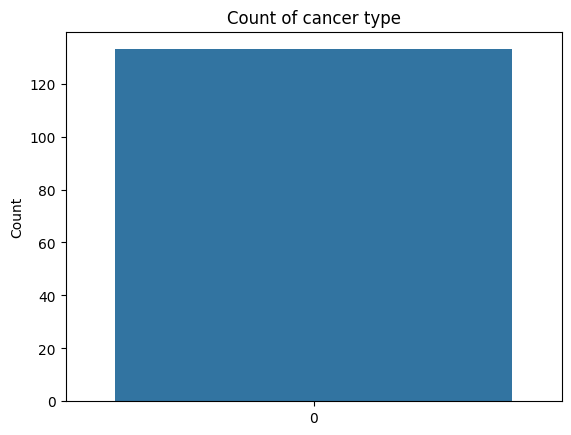

In [4]:
print(data['target'].value_counts())
plt.title('Count of cancer type')
sns.countplot(data['target'])
plt.ylabel('Count')
plt.show()

In [5]:
data.isnull().any().describe()

count      1928
unique        1
top       False
freq       1928
dtype: object

In [6]:
my_types=data.dtypes
print(my_types)

4040 : hsa-miR-9-5p         float64
4610 : hsa-miR-126-3p       float64
4700 : hsa-miR-140-5p       float64
5250 : hsa-miR-105-5p       float64
6880 : hsa-miR-297          float64
                             ...   
169417 : hsa-miR-551b-5p    float64
169419 : hsa-miR-300        float64
169420 : hsa-miR-193b-5p    float64
target                        int64
target_actual                object
Length: 1928, dtype: object


In [7]:
#clean and prepare data
data.drop('target_actual',axis=1,inplace=True)

# size of the dataframe
len(data)

133

In [8]:
Y=data.target
data.drop('target',axis=1,inplace=True)

## Get input (X)

In [9]:
X=data

## PCA

In [10]:
# from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 5.61746916e+00, -7.53913758e+00, -1.47855417e+00, ...,
         4.08672543e-02,  4.97179440e-02,  2.50423283e-14],
       [ 1.29316778e+01, -6.07334314e+00, -3.03304988e+00, ...,
        -1.74303091e-01,  4.68940648e-02,  2.50423283e-14],
       [ 8.03916106e+00, -6.59376885e+00, -3.35883902e+00, ...,
         5.17121641e-02,  2.27142219e-02,  2.50423283e-14],
       ...,
       [ 1.55513080e+01,  7.59541659e+00,  2.63352839e+00, ...,
        -7.29165310e-02, -2.73558830e-02,  2.50423283e-14],
       [ 4.81876946e+00,  7.15500755e-01,  2.09768717e+00, ...,
         2.56655357e-02,  3.46627458e-02,  2.50423283e-14],
       [-1.37692052e+01,  3.14731539e+00, -4.72032058e+00, ...,
         1.80810704e-02, -3.36215898e-02,  2.50423283e-14]])

In [11]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.36678076e-01, 2.09791401e-01, 9.17605528e-02, 6.20187567e-02,
       3.74772116e-02, 2.69386667e-02, 2.31988008e-02, 1.60145594e-02,
       1.31881034e-02, 1.18175022e-02, 1.10791900e-02, 9.74165123e-03,
       8.81907382e-03, 8.02163907e-03, 7.95143891e-03, 6.95793735e-03,
       6.16075970e-03, 5.56308403e-03, 5.47223396e-03, 4.45272112e-03,
       4.40722303e-03, 4.08439173e-03, 3.92663763e-03, 3.42589419e-03,
       3.30568784e-03, 3.01622336e-03, 2.72498978e-03, 2.68044842e-03,
       2.56221569e-03, 2.46352032e-03, 2.37319800e-03, 2.23952199e-03,
       2.09948529e-03, 2.00277834e-03, 1.93631768e-03, 1.87651325e-03,
       1.77308070e-03, 1.72007061e-03, 1.67267609e-03, 1.63561570e-03,
       1.56768718e-03, 1.50855117e-03, 1.44514477e-03, 1.40101103e-03,
       1.33139784e-03, 1.23416191e-03, 1.17197618e-03, 1.11396392e-03,
       1.09719066e-03, 1.06161413e-03, 1.05152267e-03, 9.95252845e-04,
       9.73923868e-04, 9.37524973e-04, 9.03533653e-04, 8.41946536e-04,
      

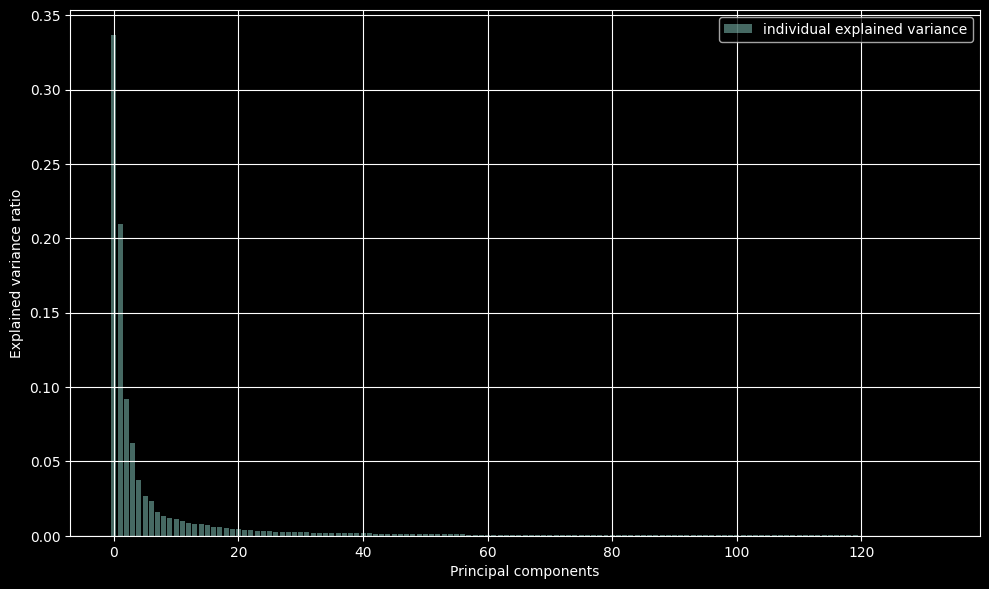

In [12]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 6))
    plt.bar(range(133), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.grid(visible=True)
    plt.tight_layout()

In [13]:
pca=PCA(n_components=60)
X_new=pca.fit_transform(X)
X_new

array([[  5.61746916,  -7.53913758,  -1.47855417, ...,   0.18502491,
         -0.07970622,  -0.06844736],
       [ 12.93167779,  -6.07334314,  -3.03304988, ...,  -0.13944736,
         -0.2103356 ,   0.02734955],
       [  8.03916106,  -6.59376885,  -3.35883902, ...,  -0.09511471,
         -0.54503164,   0.08361826],
       ...,
       [ 15.55130799,   7.59541659,   2.63352839, ...,  -0.57638467,
          0.24100141,  -0.12736585],
       [  4.81876946,   0.71550075,   2.09768717, ...,  -0.1041676 ,
         -0.65277395,   0.06905109],
       [-13.76920523,   3.14731539,  -4.72032058, ...,   0.52161775,
         -0.35916493,  -0.16247885]])

In [14]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.33667808, 0.2097914 , 0.09176055, 0.06201876, 0.03747721,
       0.02693867, 0.0231988 , 0.01601456, 0.0131881 , 0.0118175 ,
       0.01107919, 0.00974165, 0.00881907, 0.00802164, 0.00795144,
       0.00695794, 0.00616076, 0.00556308, 0.00547223, 0.00445272,
       0.00440722, 0.00408439, 0.00392664, 0.00342589, 0.00330569,
       0.00301622, 0.00272499, 0.00268045, 0.00256221, 0.00246352,
       0.00237319, 0.00223952, 0.00209946, 0.00200276, 0.0019363 ,
       0.00187643, 0.00177307, 0.00171988, 0.00167266, 0.00163556,
       0.00156751, 0.00150832, 0.00144375, 0.00140076, 0.00133123,
       0.001233  , 0.0011704 , 0.00111254, 0.00109381, 0.00106066,
       0.00104003, 0.00099426, 0.00097284, 0.00093413, 0.00089739,
       0.00083831, 0.00083043, 0.00077505, 0.00076075, 0.00074282])

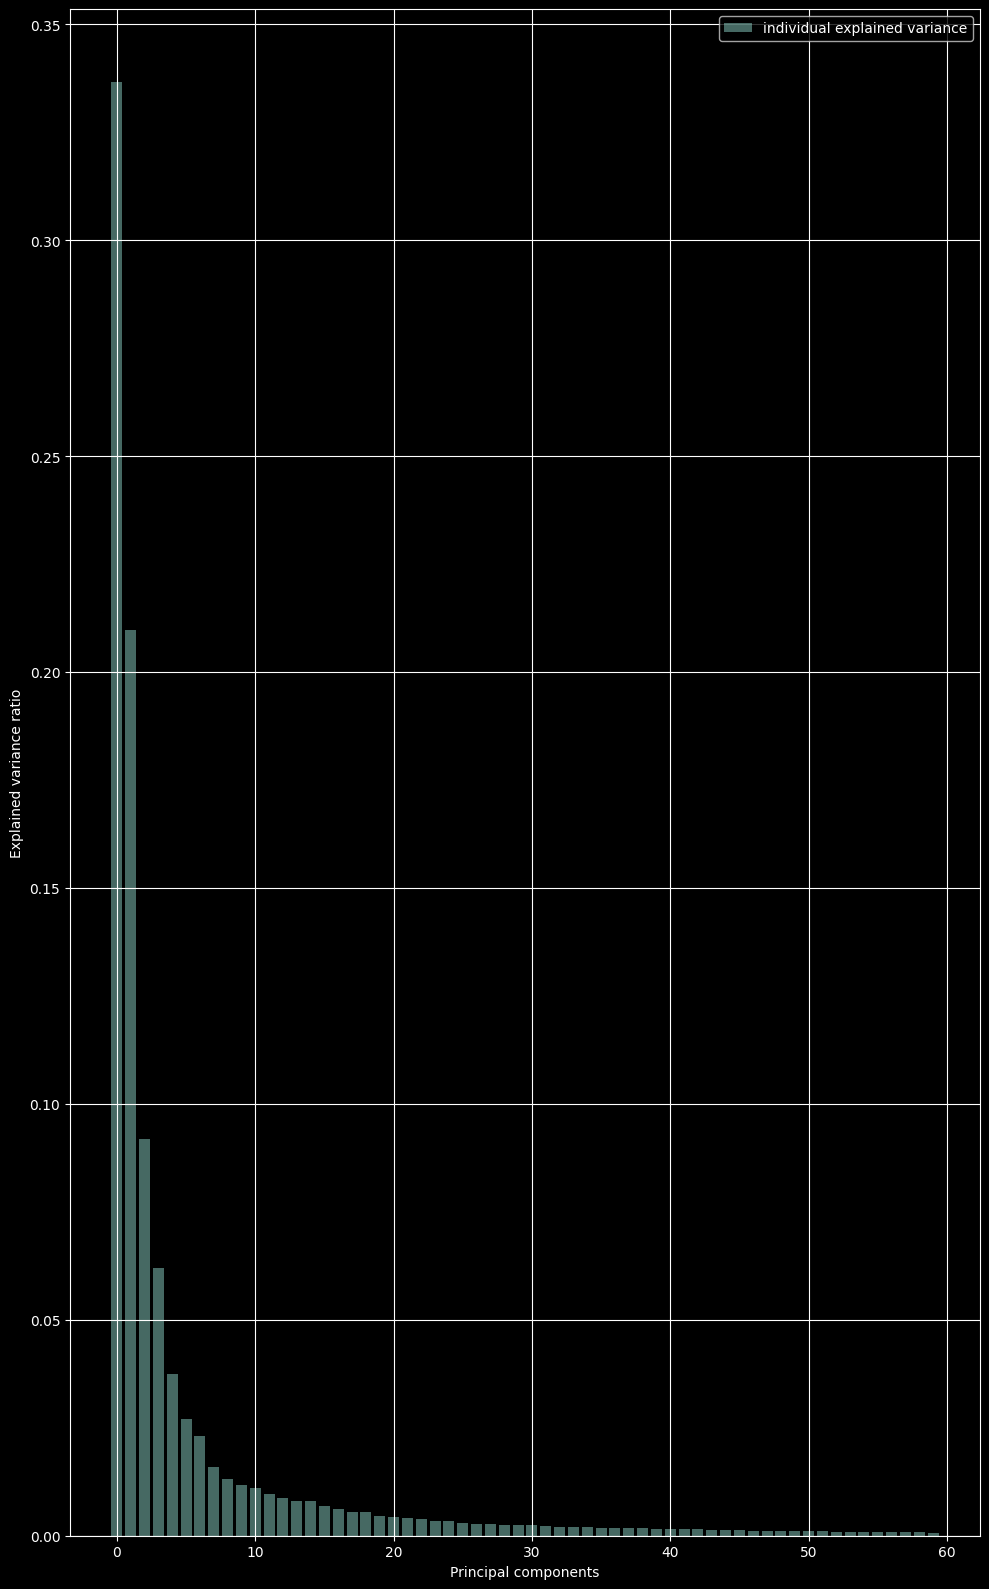

In [15]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 16))

    plt.bar(range(60), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()

In [16]:
X=X_new
X.shape, Y.shape

((133, 60), (133,))

## Applying Oversampling

In [17]:
from imblearn.over_sampling import KMeansSMOTE
oversample = KMeansSMOTE()
X_res, Y_res = oversample.fit_resample(X, Y)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
X.shape, Y.shape,X_res.shape,Y_res.shape

((133, 60), (133,), (244, 60), (244,))

In [19]:
# summarize class distribution
Y1=pd.DataFrame(Y)   
Y2=pd.DataFrame(Y_res)
print(Y1.value_counts())
print(Y2.value_counts())

target
1         122
0          11
Name: count, dtype: int64
target
0         122
1         122
Name: count, dtype: int64


## Make Y one-hot

In [20]:
Y_res = utils.to_categorical(Y_res, num_classes=2)

## Split train and test dataset

In [21]:
X_trainO,X_testO,y_trainO,y_testO= train_test_split(X_res,Y_res,test_size=0.15,stratify=Y_res)

## Scaling

In [22]:
scaler=StandardScaler()

X_trainO = scaler.fit_transform(X_trainO)
X_testO = scaler.transform(X_testO)

(X_trainO.shape, X_testO.shape)

((207, 60), (37, 60))

## Reshaping the data set to 3D to pass it through CNN

In [23]:
X_trainO.shape,X_testO.shape,y_trainO.shape,y_testO.shape

((207, 60), (37, 60), (207, 2), (37, 2))

In [24]:
#X_trainO = X_trainO.reshape(610,30,1)
#X_testO = X_testO.reshape(108,30,1)

X_trainO = X_trainO.reshape(X_trainO.shape[0],X_trainO.shape[1],1)
X_testO = X_testO.reshape(X_testO.shape[0],X_testO.shape[1],1)

# Create teacher and student model

In [25]:
# Create the teacher
teacher =keras.Sequential()
teacher.add(keras.Input(shape=(X_trainO.shape[1],1)))
teacher.add(keras.layers.Conv1D(filters=64,kernel_size= 2,activation='relu'))
teacher.add(keras.layers.BatchNormalization())
teacher.add(keras.layers.Dropout(0.2))
        
teacher.add(keras.layers.Conv1D(448, 2,activation='relu'))
teacher.add(keras.layers.BatchNormalization())
teacher.add(keras.layers.Dropout(0.2))
        
teacher.add(keras.layers.Flatten())
teacher.add(keras.layers.Dense(64,activation='relu'))
teacher.add(keras.layers.Dropout(0.2))

teacher.add(keras.layers.Dense(2,activation='sigmoid'))

teacher.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',
              metrics=['accuracy'])


# Create the student
student = keras.Sequential(
    [
        keras.Input(shape=(X_trainO.shape[1], 1)),
        layers.Conv1D(4, 2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
       # layers.LeakyReLU(alpha=0.2),
        
        layers.Conv1D(8, 2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Flatten(),
        layers.Dense(2,activation='sigmoid'),
    ],
    name="student",)
    

# Clone student for later comparison
student_scratch = keras.models.clone_model(student)

Lets make a copy of the student model for comparion

In [26]:
teacher.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 59, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 59, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 59, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 58, 448)        │        57,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 58, 448)        │         1,792 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 58, 448)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,663,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,723,202 (6.57 MB)

 Trainable params: 1,722,178 (6.57 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [27]:
student.summary()

Model: "student"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 59, 4)          │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 59, 4)          │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 59, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 58, 8)          │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 58, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 58, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 464)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,062 (4.15 KB)

 Trainable params: 1,038 (4.05 KB)

 Non-trainable params: 24 (96.00 B)

# Teacher model Training

## Teacher Oversampling

In [28]:
start_time = time.time()
teacher_historyO=teacher.fit(X_trainO,y_trainO,epochs=epoch,validation_data=(X_testO,y_testO),verbose=1)
end_time = time.time()
print( sep='\n')

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7996 - loss: 0.5108 - val_accuracy: 0.6486 - val_loss: 0.5976
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9905 - loss: 0.0632 - val_accuracy: 0.9730 - val_loss: 0.5480
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9892 - loss: 0.1382 - val_accuracy: 1.0000 - val_loss: 0.5231
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 0.5032
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9189 - val_loss: 0.4919
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.7568 - val_loss: 0.4884
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.7027 - val_loss: 0.4920
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6216 - val_loss: 0.5017


## Teacher Accuracy Oversampling

In [29]:
teacher.evaluate(X_testO,y_testO)
print("Execution time: ", end_time - start_time,"secs")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9071 - loss: 0.2165 
Execution time:  20.324458122253418 secs


# Student model Training

## Creating Student (SM_Scratch) Model

In [30]:
#compile STUDENT
student_scratch.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',
          metrics=['accuracy'])
print( sep='\n')
print('STUDENT')


STUDENT


## Student training

In [31]:
start_time = time.time()
student_scratch_historyO=student_scratch.fit(X_trainO,y_trainO,epochs=epoch,validation_data=(X_testO,y_testO),verbose=1)
end_time = time.time()
print( sep='\n')

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4987 - loss: 0.9225 - val_accuracy: 0.4865 - val_loss: 0.8085
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4385 - loss: 0.9134 - val_accuracy: 0.5405 - val_loss: 0.7958
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4404 - loss: 0.9301 - val_accuracy: 0.5676 - val_loss: 0.7836
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6193 - loss: 0.8071 - val_accuracy: 0.6216 - val_loss: 0.7720
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6134 - loss: 0.7881 - val_accuracy: 0.6216 - val_loss: 0.7604
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6267 - loss: 0.8257 - val_accuracy: 0.6757 - val_loss: 0.7492
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6249 - loss: 0.7964 - val_accuracy: 0.7027 - val_loss: 0.7382
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6742 - loss: 0.7193 - val_accuracy: 0.7568 - val_loss: 0.7275
Epoch 9

## Student Accuracy Oversampling

In [32]:
# Generate generalization
student_scratch.evaluate(X_testO,y_testO)
print("Execution time: ", end_time - start_time,"secs")
print( sep='\n')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9431 - loss: 0.3288 
Execution time:  6.816328763961792 secs



# Construct distiller class

In [33]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results
    
    def call(self, x):
        return self.student(x)

In [34]:
 # Initialize and compile distiller
distiller = Distiller(student=student, teacher=teacher)
distiller.compile(optimizer=keras.optimizers.Adam(),
metrics=['accuracy'],
student_loss_fn= keras.losses.BinaryCrossentropy() ,
distillation_loss_fn=keras.losses.KLDivergence(),
alpha=0.1,
temperature=10,
)
    

# Distill teacher to student

# Confusion Matrix Teacher

In [35]:
print( sep='\n')
print('DISTILL TEACHER TO STUDENT')
start_time = time.time()
kd_historyO=distiller.fit(X_trainO, y_trainO, epochs=epoch, verbose=1, validation_data=(X_testO,y_testO))
end_time = time.time()
print( sep='\n')


DISTILL TEACHER TO STUDENT
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:578: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5060 - distillation_loss: 9.8769e-04 - loss: 0.5158 - student_loss: 0.8430 - val_accuracy: 0.8919 - val_loss: 0.5127 - val_student_loss: 0.5120
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7028 - distillation_loss: 7.6082e-04 - loss: 0.4914 - student_loss: 0.7003 - val_accuracy: 0.9459 - val_loss: 0.5125 - val_student_loss: 0.4617
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8713 - distillation_loss: 4.8128e-04 - loss: 0.5119 - student_loss: 0.5343 - val_accuracy: 0.9459 - val_loss: 0.5116 - val_student_loss: 0.4164
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8648 - distillation_loss: 3.6206e-04 - loss: 0.5163 - student_loss: 0.4076 - val_accuracy: 0.9730 - val_loss: 0.5106 - val_student_loss: 0.3711
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9395 - distillation_loss: 3.2954e-04 - loss: 0.5182 - student_loss: 0.3608 - val_accuracy: 1.0000 - val_loss: 0.5095 - v

In [36]:
y_predtO=teacher.predict(X_testO)

#Confusion matrix
cmO=metrics.confusion_matrix(y_testO.argmax(axis=1),y_predtO.argmax(axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


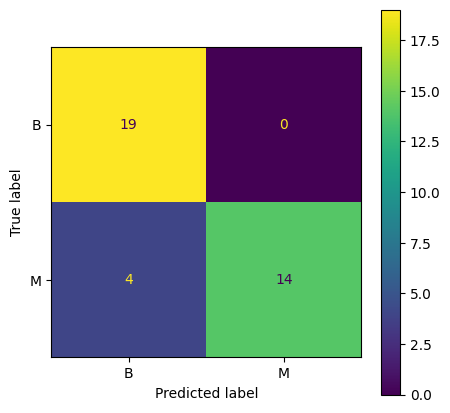

In [37]:
#Plot
dispO=metrics.ConfusionMatrixDisplay(confusion_matrix=cmO,display_labels=['B','M'],)
fig, ax = plt.subplots(figsize=(5,5))
dispO.plot(ax=ax);

### Malignant = 2, Benign = 1

Lets round the values

# Confusion matrix student with KD

In [38]:
y_predsO=distiller.predict(X_testO)

#Confusion matrix
cmO=metrics.confusion_matrix(y_testO.argmax(axis=1),y_predsO.argmax(axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


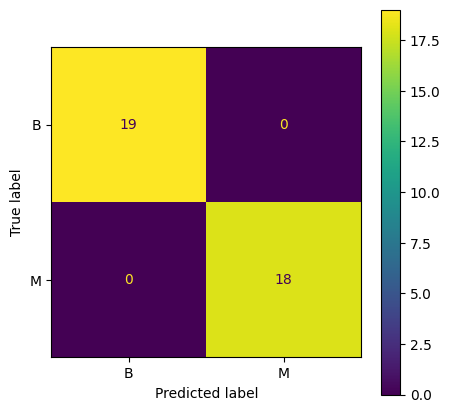

In [39]:
#Plot
dispO=metrics.ConfusionMatrixDisplay(confusion_matrix=cmO,display_labels=['B','M'],)
fig, ax = plt.subplots(figsize=(5,5))
dispO.plot(ax=ax);
#plt.savefig("CM3.svg")

In [40]:
from sklearn.metrics import roc_curve, auc

false_positive_rateO, true_positive_rateO, thresholdsO = roc_curve(y_testO.argmax(axis=1),y_predtO.argmax(axis=1))
roc_aucOt = auc(false_positive_rateO, true_positive_rateO)
roc_aucOt

0.8888888888888888

In [41]:
false_positive_rateOs, true_positive_rateOs, thresholdsOs = roc_curve(y_testO.argmax(axis=1),y_predsO.argmax(axis=1))
roc_aucOs = auc(false_positive_rateO, true_positive_rateO)
roc_aucOs

0.8888888888888888

Text(0.5, 0, 'False Positive Rate')

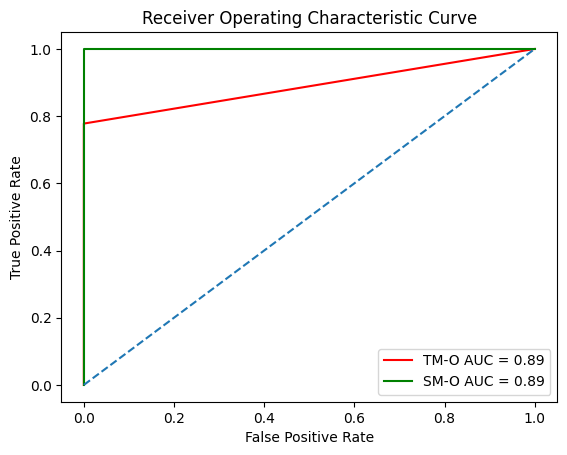

In [42]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rateO,true_positive_rateO, color='red',label = 'TM-O AUC = %0.2f' % roc_aucOt)
plt.plot(false_positive_rateOs,true_positive_rateOs, color='green',label = 'SM-O AUC = %0.2f' % roc_aucOs)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("roc_BCT-O.svg")

# Function for plotting model's accuracy and loss

In [43]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.grid(visible=True)
  plt.show()
  #plt.savefig("Tacc.svg")

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.grid(visible=True)
  plt.show()
  #plt.savefig("Tloss.svg")

# Plotting of teacher model

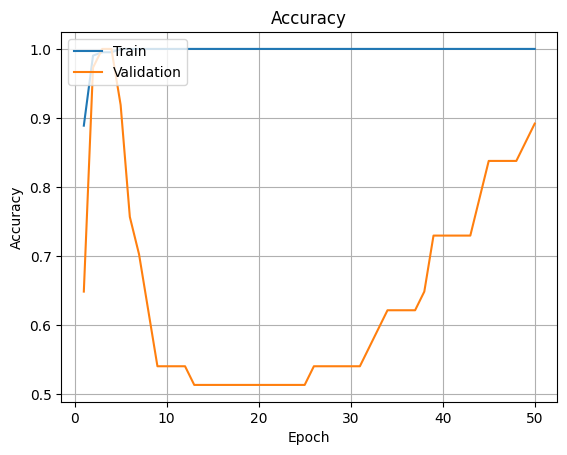

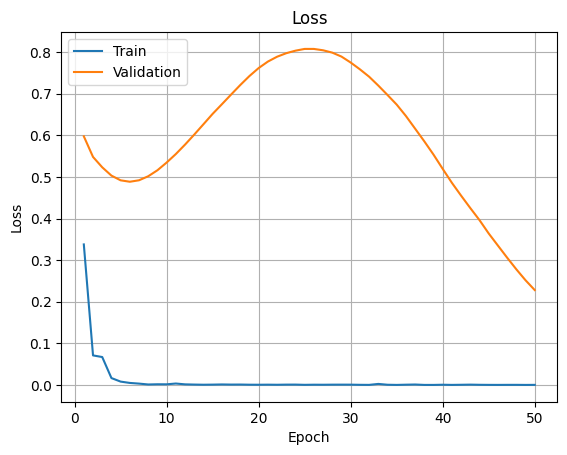

In [44]:
plotLearningCurve(teacher_historyO,epoch)

# Plotting Student scratch Model

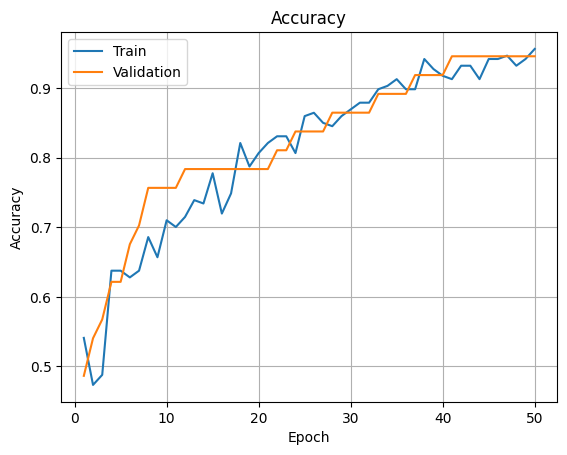

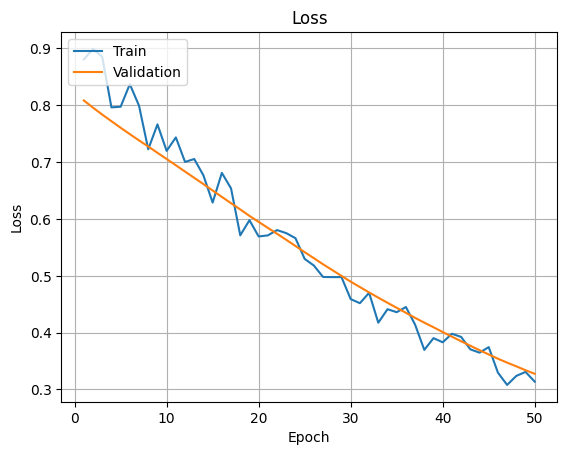

In [45]:
plotLearningCurve(student_scratch_historyO,epoch)

# Plotting knowledge distilled accuracy and loss

In [46]:
def plotKDCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Student Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.grid(visible=True)
  #plt.savefig("SmAcc.svg")
  plt.show()

  plt.plot(epochRange,history.history['student_loss'])
  plt.plot(epochRange,history.history['val_student_loss'])
  plt.title('Student Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.grid(visible=True)
  #plt.savefig("SmLoss.svg")
  plt.show()

# Plot of Student Knowldege Distilled Model

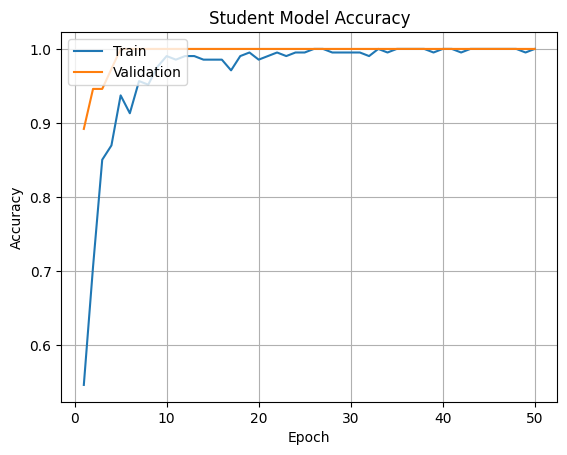

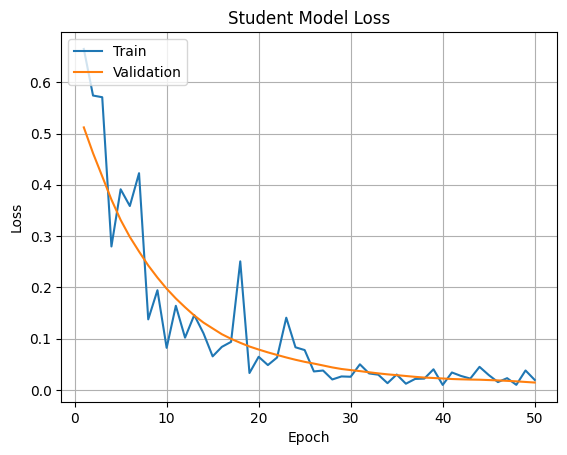

In [47]:
plotKDCurve(kd_historyO,epoch)

# Accuracy and loss of Teacher vs Student KD model 

In [48]:
def plotKDCurveProf(his,tHis,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,tHis.history['accuracy'])
  plt.plot(epochRange,tHis.history['val_accuracy'])
  plt.plot(epochRange,his.history['accuracy'])
  plt.plot(epochRange,his.history['val_accuracy'])

  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['T_train','T_val','KD_train','KD_val'],loc='lower right')
  plt.grid(visible=True)
  plt.savefig("T-Sacc.svg")
  plt.show()


  plt.plot(epochRange,tHis.history['loss'])
  plt.plot(epochRange,tHis.history['val_loss'])
  plt.plot(epochRange,his.history['student_loss'])
  plt.plot(epochRange,his.history['val_student_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['T_train','T_val','KD_train','KD_val'],loc='upper left')
  plt.grid(visible=True)
  plt.savefig("T-Sloss.svg")
  plt.show()

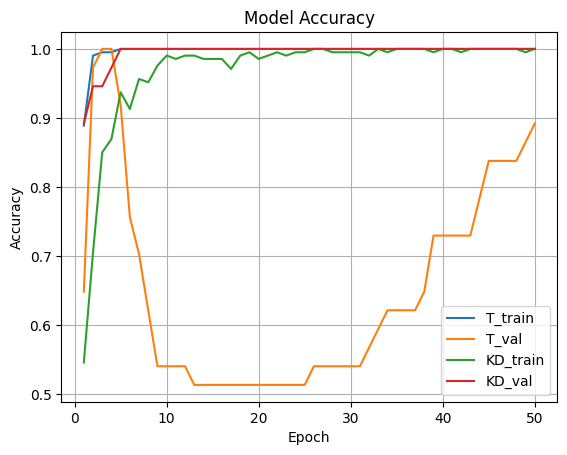

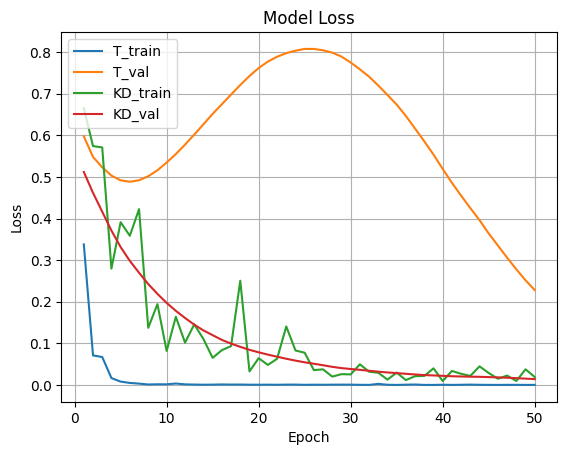

In [49]:
plotKDCurveProf(kd_historyO,teacher_historyO,epoch)

 # Student with KD Vs Student without Kd Accuracy and loss

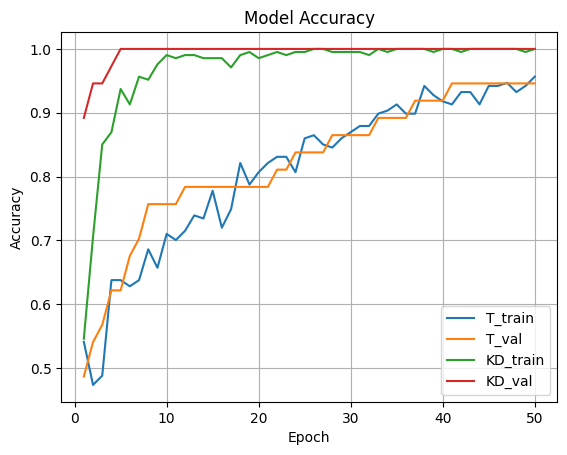

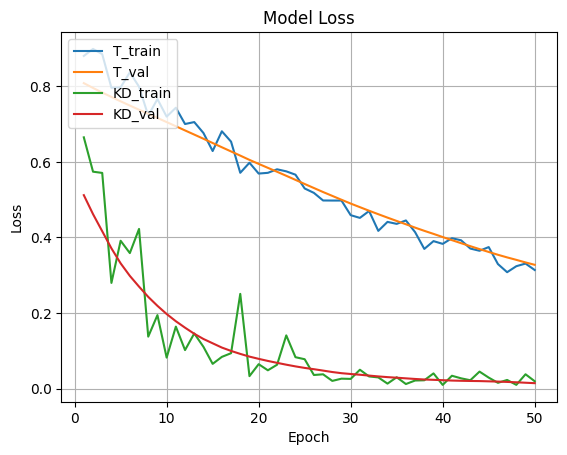

In [50]:
plotKDCurveProf(kd_historyO,student_scratch_historyO,epoch)

# Result Summary

In [51]:
print("Vals. \t\t TM \t SM_scratch \t SM")
print("="*50)
print("Acc. \t\t %.2f \t %.2f \t\t %.2f"%(teacher_historyO.history['accuracy'][epoch-1],student_scratch_historyO.history['accuracy'][epoch-1],kd_historyO.history['accuracy'][epoch-1]))
print("Val. Acc. \t %.2f \t %.2f \t\t %.2f"%(teacher_historyO.history['val_accuracy'][epoch-1],student_scratch_historyO.history['val_accuracy'][epoch-1],kd_historyO.history['val_accuracy'][epoch-1]))
print("Loss. \t\t %.2f \t %.2f \t\t %.2f"%(teacher_historyO.history['loss'][epoch-1],student_scratch_historyO.history['loss'][epoch-1],kd_historyO.history['loss'][epoch-1]))
print("Val. Loss. \t %.2f \t %.2f \t\t %.2f"%(teacher_historyO.history['val_loss'][epoch-1],student_scratch_historyO.history['val_loss'][epoch-1],kd_historyO.history['val_loss'][epoch-1]))


Vals. 		 TM 	 SM_scratch 	 SM
Acc. 		 1.00 	 0.96 		 1.00
Val. Acc. 	 0.89 	 0.95 		 1.00
Loss. 		 0.00 	 0.31 		 0.50
Val. Loss. 	 0.23 	 0.33 		 0.51
